In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import pickle

In [2]:
!conda info


     active environment : base
    active env location : C:\Users\sahil\anaconda3
            shell level : 1
       user config file : C:\Users\sahil\.condarc
 populated config files : C:\Users\sahil\.condarc
          conda version : 4.10.1
    conda-build version : 3.18.11
         python version : 3.8.3.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\sahil\anaconda3  (writable)
      conda av data dir : C:\Users\sahil\anaconda3\etc\conda
  conda av metadata url : https://repo.anaconda.com/pkgs/main
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
    

In [3]:
df_segmentation = pd.read_csv("segmentation data.csv", index_col= 0)

In [4]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


## Descriptive Statistics

In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation

In [6]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


## Correlation Heatmap


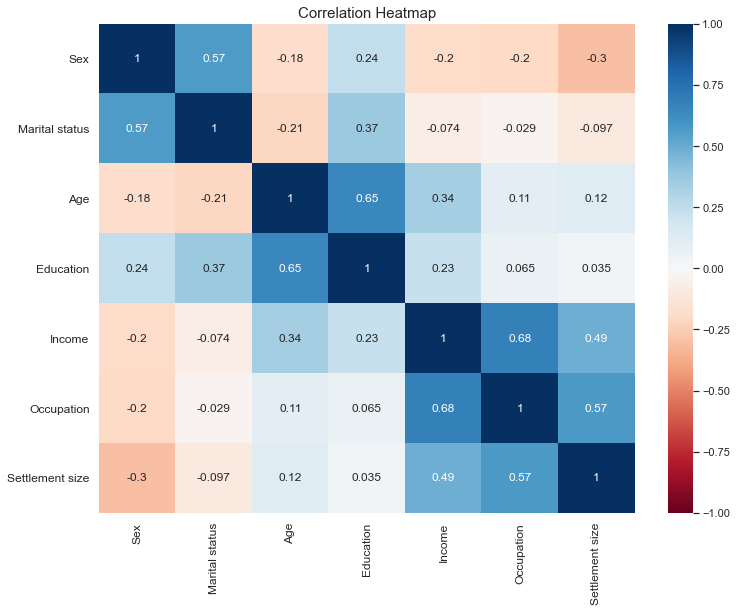

In [7]:
plt.figure(figsize= (12,9))
plt.title("Correlation Heatmap", {'fontsize': 15})
s = sns.heatmap(df_segmentation.corr(), 
                annot= True, 
                cmap= 'RdBu',
                vmin= -1,
                vmax= 1) 
s.set_yticklabels(s.get_yticklabels(), rotation= 0, fontsize= 12)
s.set_xticklabels(s.get_xticklabels(), rotation= 90, fontsize= 12)
plt.show()

## Scatter Plot

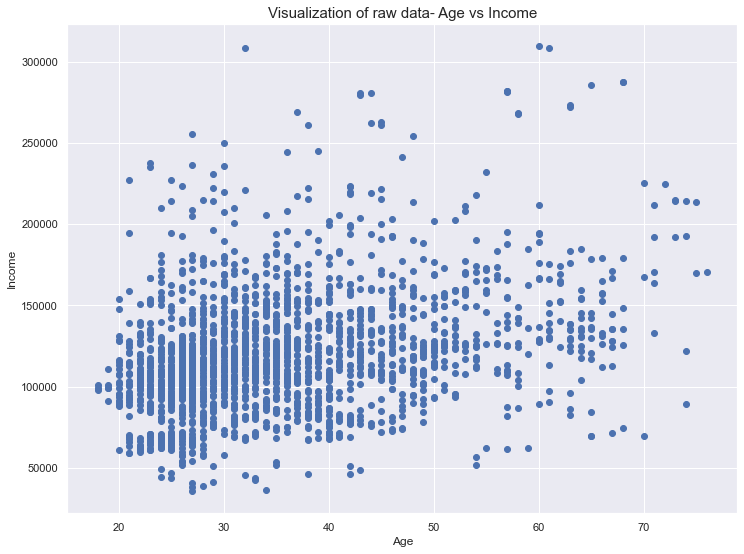

In [8]:
plt.figure(figsize=(12,9))
plt.title("Visualization of raw data- Age vs Income", {'fontsize': 15})
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel("Age", {'fontsize': 12})
plt.ylabel("Income", {'fontsize': 12})
plt.show()

## Standardization

In [9]:
scaler =  StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Hierarchial Clustering

In [10]:
hier_clust= linkage(segmentation_std, method= 'ward')


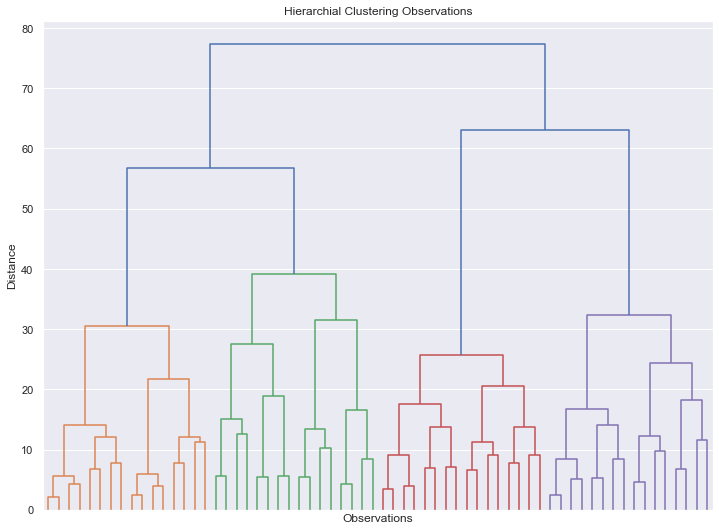

In [11]:
plt.figure(figsize=(12,9))
plt.title("Hierarchial Clustering Observations")
plt.xlabel('Observations')
plt.ylabel("Distance")
dendrogram(hier_clust,
          truncate_mode = 'level',
           p = 5,
           show_leaf_counts= False,
           no_labels= True,
          )
plt.show()


## K-means Clustering


In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

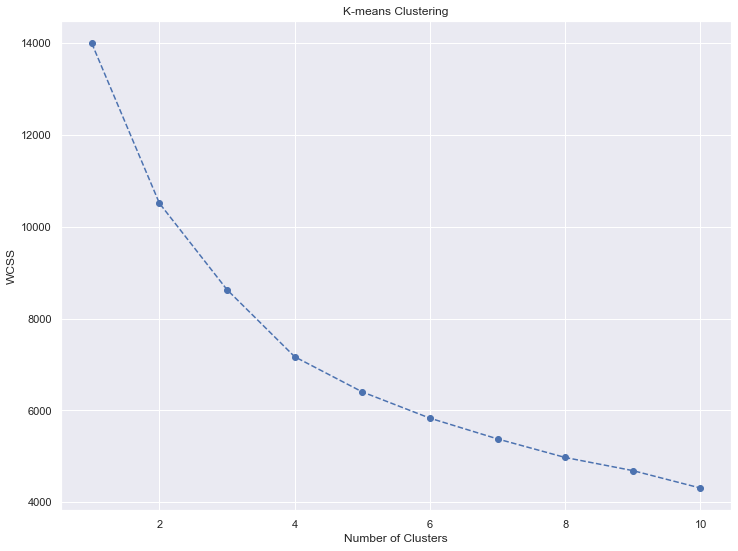

In [13]:
plt.figure(figsize= (12,9))
plt.title("K-means Clustering")
plt.plot(range(1,11), wcss, marker= 'o', linestyle= '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters= 4, init= 'k-means++', random_state= 42)

In [15]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

## Results

In [16]:
df_segm_kmeans= df_segmentation.copy()
df_segm_kmeans['Segment K-means']= kmeans.labels_

In [17]:
df_segm_analysis= df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [18]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,1


In [19]:
df_segm_analysis['N Obs']= df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [20]:
df_segm_analysis['Prop Obs']= df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [21]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [22]:
 df_segm_analysis.rename({0: 'well-off',
                          1: 'fewer-opportunities',
                          2: 'career focused',
                          3: 'standard'
     
 })

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [23]:
df_segm_kmeans['Labels']= df_segm_kmeans['Segment K-means'].map({0: 'well-off',
                                                                 1: 'fewer opportunities',
                                                                 2: 'career focused',
                                                                 3: 'standard'
    
})

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


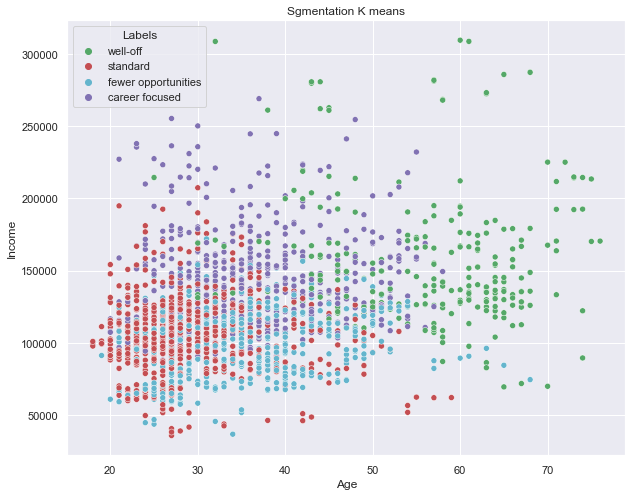

In [24]:
y_axis= df_segm_kmeans['Income']
x_axis= df_segm_kmeans['Age']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue= df_segm_kmeans['Labels'], palette= ['g', 'r', 'c', 'm'])
plt.title('Sgmentation K means')
plt.show()

## PCA

In [25]:
pca = PCA()

In [26]:
pca.fit(segmentation_std)

PCA()

In [27]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [28]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455],
       [-0.70718503,  0.49755981, -0.1351596 ,  0.10659686,  0.07889011,
         0.13394187, -0.44556535],
       [-0.05111859,  0.12551723, -0.09958614, -0.11433321,  0.66281185,
        -0.70912085,  0.12833901],
       [-0.05489292, -0.40390112, -0.62957581,  0.65781577,  0.05863312,
        -0.03311512, -0.01512939]])

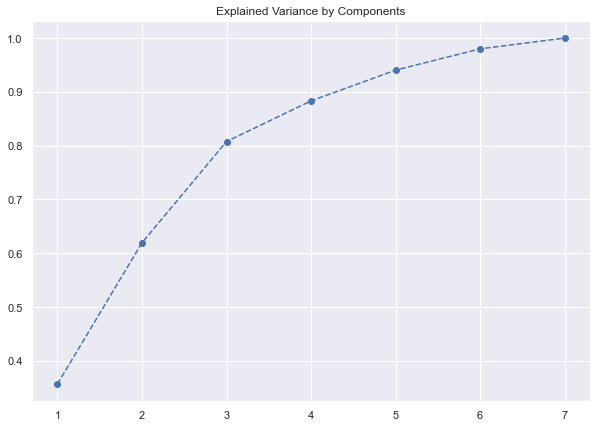

In [29]:
plt.figure(figsize=(10,7))
x_axis= range(1,8)
y_axis= pca.explained_variance_ratio_.cumsum()
plt.plot(x_axis, y_axis, marker= 'o', linestyle= '--')
plt.title("Explained Variance by Components")
plt.ylabel= "Number of Components"
plt.xlabel= "Cumulative Explained"


## PCA Results

In [30]:
# In PCA, ideally we aim to preserve 70-80% of the variance, hence we take n_components= 3 as seen in the above graph.

pca= PCA(n_components= 3)

In [31]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [32]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114])

In [33]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [34]:
df_pca_comp= pd.DataFrame(data= pca.components_,
            columns= df_segmentation.columns,
            index= ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x1f9b1f059d0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

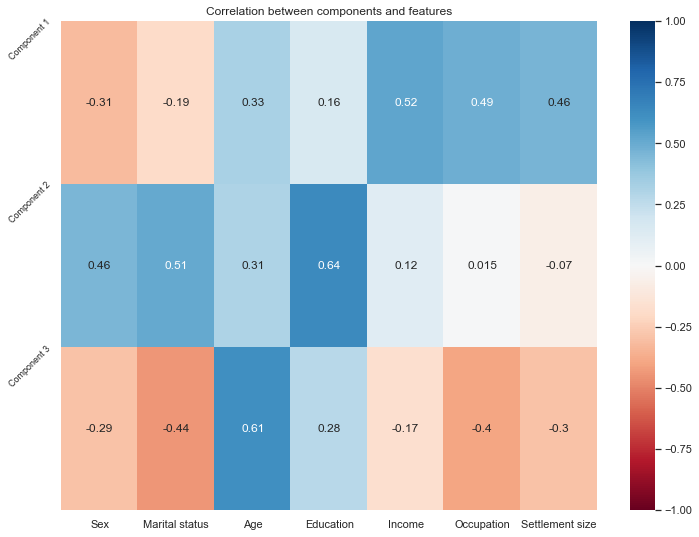

In [35]:
plt.figure(figsize= (12,9))
plt.title("Correlation between components and features")
sns.heatmap(df_pca_comp,
            vmin= -1,
           vmax= 1, 
           annot= True,
           cmap= 'RdBu')
plt.yticks(ticks= [0,1,2], labels= df_pca_comp.index, rotation= 45, fontsize= 9)

In [36]:
scores_pca= pca.transform(segmentation_std)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

## K-means Clustering with PCA

In [37]:
wcss= []
for i in range(1,11):
    kmeans_pca= KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    

In [38]:
wcss

[11307.57113594592,
 7831.498055436471,
 5954.591095084344,
 4543.1471017366775,
 3834.8501342328227,
 3317.53397864671,
 2871.221650552544,
 2563.510339647123,
 2270.974911003038,
 2010.0461962640697]

Text(0.5, 1.0, 'K-means with PCA Clustering')

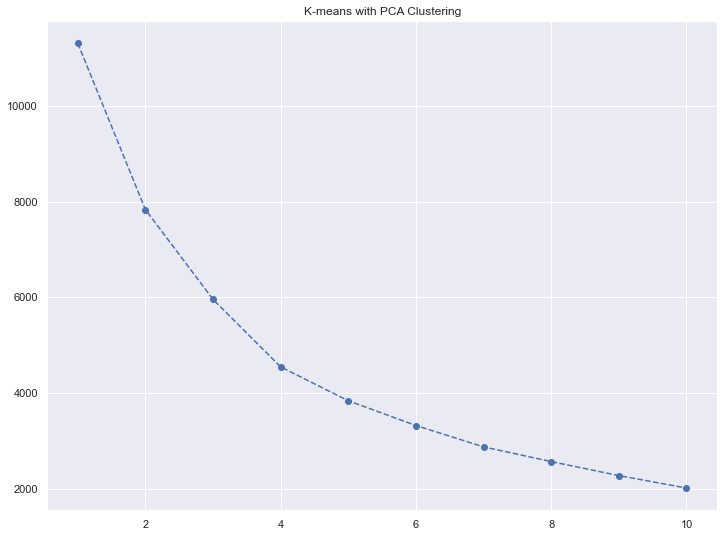

In [39]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker= 'o', linestyle= '--')
#x_axis= plt.xlabel("Number of clusters")
#y_axis= plt.ylabel("WCSS")
plt.title("K-means with PCA Clustering")

In [40]:
kmeans_pca= KMeans(n_clusters= 4, init= "k-means++", random_state= 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## K-means Clustering with PCA Results

In [41]:
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [42]:
df_scores_pca= pd.DataFrame(scores_pca,
            columns= ["Component 1", "Component 2", "Component 3"])
df_scores_pca.head()

,Component 1,Component 2,Component 3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909


In [43]:
df_segm_kmeans_pca= pd.concat([df_segmentation.reset_index(drop=True), df_scores_pca], axis=1)
df_segm_kmeans_pca['Segment K-Means PCA']= kmeans_pca.labels_
df_segm_kmeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-Means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [44]:
df_segm_kmeans_frequency= df_segm_kmeans_pca.groupby(['Segment K-Means PCA']).mean()
df_segm_kmeans_frequency

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-Means PCA,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [45]:
df_segm_kmeans_frequency['N Obs']= df_segm_kmeans_pca[['Segment K-Means PCA','Sex']].groupby(['Segment K-Means PCA']).count()
df_segm_kmeans_frequency['Prop Obs']= df_segm_kmeans_frequency['N Obs']/df_segm_kmeans_frequency['N Obs'].sum()

In [46]:
df_segm_kmeans_frequency

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-Means PCA,,,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


In [47]:
df_segm_kmeans_frequency.rename({0: 'fewer opportunities',
                                                       1: 'career focused',
                                                       2: 'standard',
                                                       3: 'well-off'},
                               inplace= True)

In [48]:
df_segm_kmeans_frequency

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-Means PCA,,,,,,,,,,,,
fewer opportunities,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
career focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
standard,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


In [49]:
df_segm_kmeans_pca['Legend']= df_segm_kmeans_pca['Segment K-Means PCA'].map({0: 'fewer opportunities',
                                                       1: 'career focused',
                                                       2: 'standard',
                                                       3: 'well-off'})

In [50]:
df_segm_kmeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-Means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,standard


C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters by PCA Components')

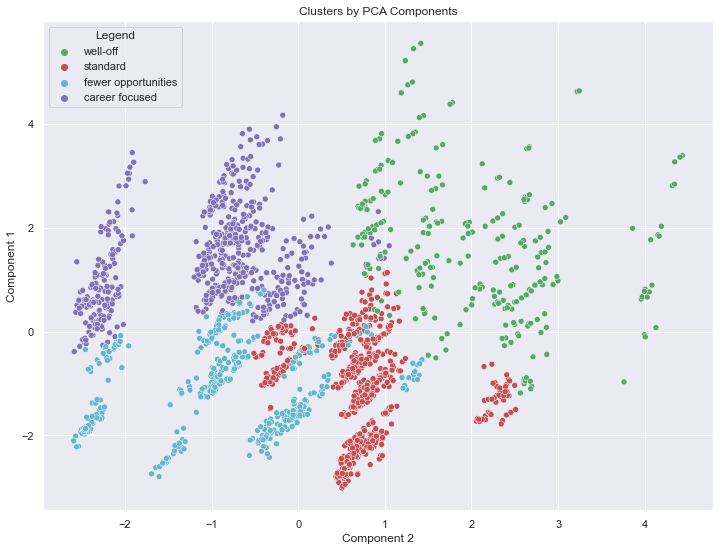

In [51]:
x_axis= df_segm_kmeans_pca['Component 2']
y_axis= df_segm_kmeans_pca['Component 1']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis, y_axis, palette= ['g', 'r', 'c', 'm'], hue= df_segm_kmeans_pca['Legend'])
plt.title("Clusters by PCA Components")

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters by PCA Components')

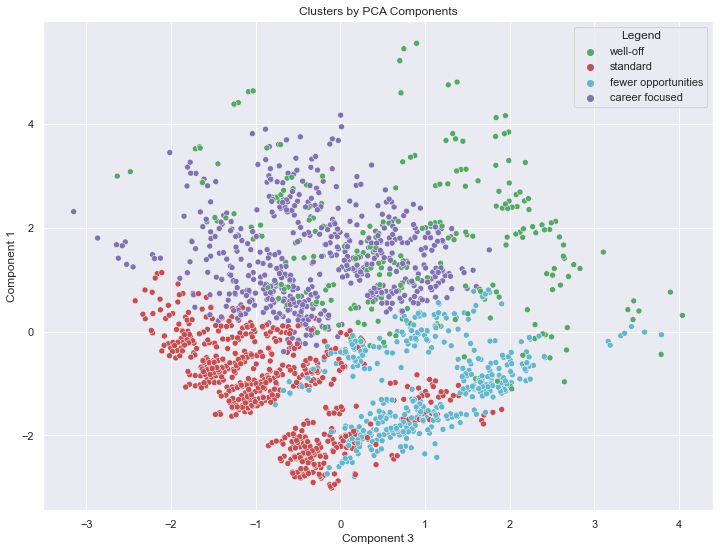

In [52]:
x_axis= df_segm_kmeans_pca['Component 3']
y_axis= df_segm_kmeans_pca['Component 1']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis, y_axis, palette= ['g', 'r', 'c', 'm'], hue= df_segm_kmeans_pca['Legend'])
plt.title("Clusters by PCA Components")

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters by PCA Components')

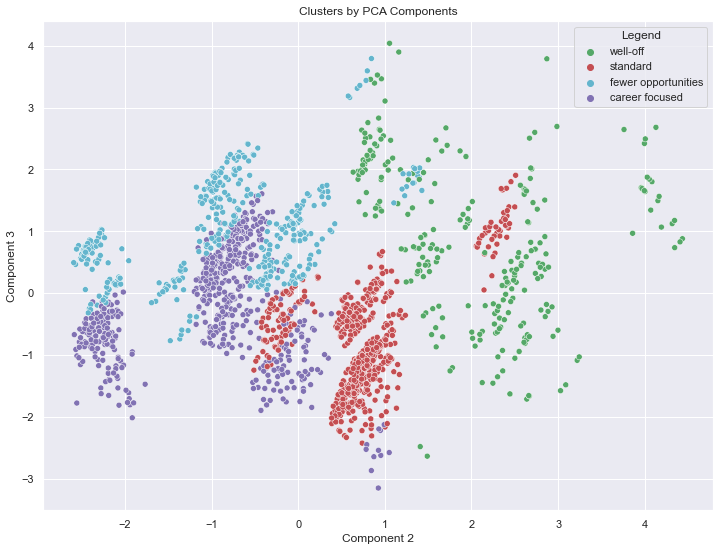

In [53]:
x_axis= df_segm_kmeans_pca['Component 2']
y_axis= df_segm_kmeans_pca['Component 3']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis, y_axis, palette= ['g', 'r', 'c', 'm'], hue= df_segm_kmeans_pca['Legend'])
plt.title("Clusters by PCA Components")

## Data Export

In [54]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [55]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [56]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))